# 【課題】顔認識処理を以下の観点でカスタマイズを実施する。
#   課題② 難易度高
face_recognitionで、顔をどのように分類しているか理解するために、検出した顔に特徴点を追加してください。  
※課題①を対応した前提  
ヒント  
[1]「検出した顔の数分、認識処理」でface_recognitionメソッド「face_landmarks」を実行  
　　face_landmarksの引数は(画像, 検出した顔)  
[2]「認識処理の結果」の合成の後に、 Matplotlibを使用して特徴点を合成  
[3] 出力ファイル名を「output_landmarks.jpg」として保存

---
**「顔認識の基礎知識」で解説したOSSライブラリを使用して、**  
**入力した写真から特定の人物の顔を認識させるプログラムです。** 

---
### **■処理に必要なライブラリをインポートします【参考：第三章】**

In [26]:
# ライブラリのインポート
import face_recognition # Face recognition:顔認識
import dlib             # Dlib:機械学習
import cv2              # OpenCV:画像処理
from matplotlib import pyplot as plt # 画像表示
import time             # 処理時間計測


### **■各種パラメータを設定します【参考：第六章、第七章】**

①検出モデル  
hog:計算量は少ないですが、精度は低いです。  
cnn:計算量は多いですが、精度は高いです。  

②顔検出精度  
数字を大きくすると精度が上がりますが、計算量も上がります。デフォルトは1です。  
2より大きくするとマシン負荷が高くなりすぎる可能性があります。  

③顔認識の閾値  
値を低くするほど判定が厳しくなり、高くするほど判定が緩くなります。デフォルトは0.6です。  
複数の顔がある写真の認識で、ほとんどの顔が同一となった場合、  
この数値を調整することで、より精度の高い認識を行うことができます。  


In [27]:
# ------- パラメータ --------------------------------
# 検出モデル
MODEL = "hog"
#MODEL = "cnn"

# 顔検出精度
UPSAMPLE = 1

# 顔認識の閾値
TOLERANCE = 0.6
# ---------------------------------------------------

### **■OpenCVを使って画像(顔写真)を入力します【参考：第四章】**

顔認識対象の画像と顔認識させる画像の2枚を読み込みます。  

OpenCV はカラーフォーマットが BGR 形式であるため、  
一般的な RGB 形式にするためには、読み込み後に変換が必要です。

In [28]:
# 画像ファイル読み込み
image         = cv2.imread(r"Photo/family_1_papa.jpg")
unknown_image = cv2.imread(r"Photo/family_2.jpg")

# BGR→RGBに変換
image         = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
unknown_image = cv2.cvtColor(unknown_image, cv2.COLOR_BGR2RGB)

### **■face_recognitionを使って写真から顔を検索します【参考：第五章、第六章】**

画像に写っているすべての顔を検索します。  
指定した検出モデルとアップサンプリング回数で処理を行います。

検出モデルをcnnにしたり、アップサンプリング回数を増やすと、処理に時間が掛かります。  
完了後に処理時間が表示されます。

顔を検出できなかった場合はここで終了です。

In [29]:
# 時間計測 ： 開始時刻を記録
cp_0 = time.time() 

# 画像に写っているすべての顔を検索
face_locations = face_recognition.face_locations(unknown_image, model=MODEL, number_of_times_to_upsample=UPSAMPLE)

# 時間計測 ： 終了時刻を記録
cp_1 = time.time() 
time_hog = cp_1 - cp_0 # [終了時刻 - 開始時刻] から処理時間を算出 
print ("face_locations time :{0}".format(time_hog) + "[sec]", flush=True)

# 顔を検出できなかった場合、ここで終了
if len(face_locations) <= 0:
    raise SystemExit("Face Not Found")

face_locations time :0.5239989757537842[sec]


### **■face_recognitionを使って顔認識を行います【参考：第七章】**

検出した顔のデータを、認識させる顔データと比較して、認識結果と認識値を出力します。  
検出した顔が複数ある場合、すべての顔データと比較します。

認識結果は True/False のいずれかで出力します。  
認識値は 0 に近いほど顔が似ていると判断したことになります。

### 課題② ヒント 1 (見たいときだけ下部を反転)    
「検出した顔の数分、認識処理」でface_recognitionメソッド「face_landmarks」を実行  
face_landmarksの引数は(画像, 検出した顔)  
<span style="color: white ">
    face_landmarks = face_recognition.face_landmarks(unknown_image, face_locations)  
</span>

In [33]:
# 顔を検出できた場合、顔認識を行う
print("I found {} face(s) in this photograph.".format(len(face_locations)))

# 比較元の顔のエリアを指定する
known_face_encodings = face_recognition.face_encodings(image)[0]

# 検出した各顔の顔認識を行うループ
resultslist = []
distslist = []
#課題① ヒント [1]「結果格納エリア」 に「名前格納エリア」を追加する
namelist = []  
#課題① ヒント[1] END   

for index in range(len(face_locations)):

    # 比較先の顔のエリアを指定する
    unknown_encoding = face_recognition.face_encodings(unknown_image, face_locations)[index]

    # 認識結果を出力
    results = face_recognition.compare_faces([known_face_encodings], unknown_encoding, TOLERANCE)
    print(results)
    resultslist.append(results)

#課題① ヒント [2] 「検出した顔の数分、認識処理を実施する。」で、
#           「認識結果を出力」で、結果Ture/Falseにより「名前を格納するエリア」に名前を格納する。
    #顔の名前設定処理 初期値は"Nobody"  
    name = "Nobody"  
    #認識結果が「True」の場合、namelistに追加したface_nameを設定  
    #認識結果が「False」の場合、namelistには初期値は"Nobody"を設定  
    if True in results:  
        name = "SAM"  
    namelist.append(name)
#課題① ヒント[2] END    


    # 認識値を出力
    dists = face_recognition.face_distance([known_face_encodings], unknown_encoding)
    print(dists)
    distslist.append(dists)

#課題② ヒント [1] 検出した顔の数分、認識処理」でface_recognitionメソッド「face_landmarks」を実行  
#                  face_landmarksの引数は(画像, 検出した顔)  
#ここに追加
#課題② ヒント[1] END   

I found 3 face(s) in this photograph.
[False]
[0.70715043]
[False]
[0.61667027]
[True]
[0.22101676]


### **■OpenCVを使って顔認識の結果を出力します【参考：第八章】**

画像から検出した顔を枠で囲み、認識結果と認識値を描画します。

描画後は別ウィンドウで画像を表示し、さらにファイルとして保存します。

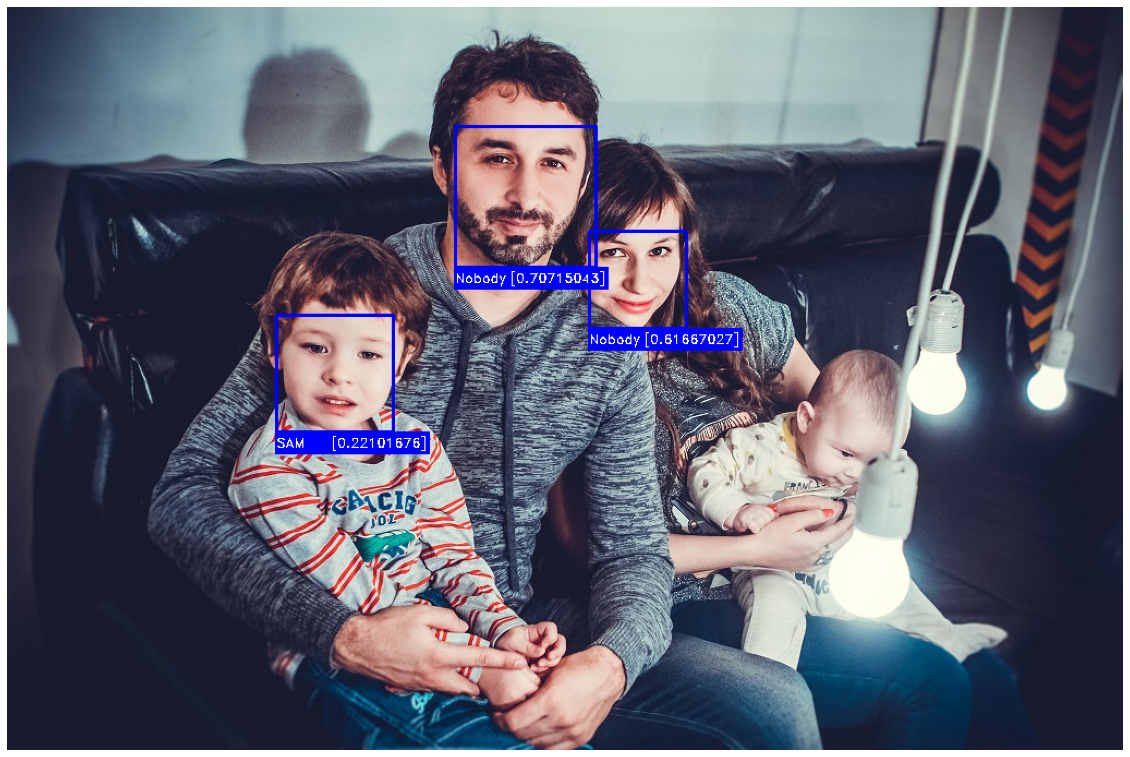

In [34]:
# 認識した結果を画像に合成するループ
rect_color = (0, 0, 255)     # 青枠
font = cv2.FONT_HERSHEY_DUPLEX
fontsize = 0.4
font_color = (255, 255, 255) # 白文字
index = 0
for top, left, bottom, right in face_locations:
    # 顔を枠で囲む
    cv2.rectangle(unknown_image, (left, top), (right, bottom), rect_color, thickness=2)

    # 認識結果と値を描き込む
    cv2.rectangle(unknown_image, (right - 1, bottom), (right + 140, bottom + 20), rect_color, thickness=-1)
#課題① ヒント [3] 「認識結果と値を書き込む」処理で、認識結果ではなく、名前を設定して表示する。(表示位置の微調整も行う) 
#    cv2.putText(unknown_image, str(resultslist[index]), (right, bottom + 14), font, fontsize, font_color, 1)
    cv2.putText(unknown_image, str(namelist[index]), (right, bottom + 14), font, fontsize, font_color, 1)  
#課題① ヒント[3] END      
    cv2.putText(unknown_image, str(distslist[index]), (right + 50, bottom + 14), font, fontsize, font_color, 1)
    index += 1

# 画像を出力【matplotlib】
fig, ax = plt.subplots(figsize=(20, 20))
ax.imshow(unknown_image)
ax.set_axis_off()
#課題① ヒント [4] 出力するファイル名を「 output_name.jpg」に変更する。
#fig.savefig("Photo/output.jpg")
fig.savefig("Photo/output_name.jpg")
#課題① ヒント[4] END

# 画像を出力【OpenCV】
#output_image = cv2.cvtColor(unknown_image, cv2.COLOR_RGB2BGR)
#cv2.imwrite("Photo\output.jpg", output_image) # 保存
#cv2.imshow("image",output_image)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

### 課題② ヒント 2 (見たいときだけ下部を反転)    
「認識処理の結果」の合成の後に、 Matplotlibを使用して特徴点を合成  
<span style="color: white ">
import numpy as np  
<br>
fig, ax = plt.subplots(figsize=(20, 20))    
ax.imshow(unknown_image)  
ax.set_axis_off()  
</span>
<br>
<span style="color: white ">
for face in face_landmarks:  
&nbsp;&nbsp;&nbsp;&nbsp;for name, points in face.items():  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;points = np.array(points)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;ax.plot(points[:, 0], points[:, 1], 'o-', ms=3)  
</span>

### 課題② ヒント3 (見たいときだけ下部を反転)    
出力ファイル名を「output_landmarks.jpg」として保存  
<span style="color: white ">
fig.savefig("Photo/output_landmarks.jpg")  
</span>

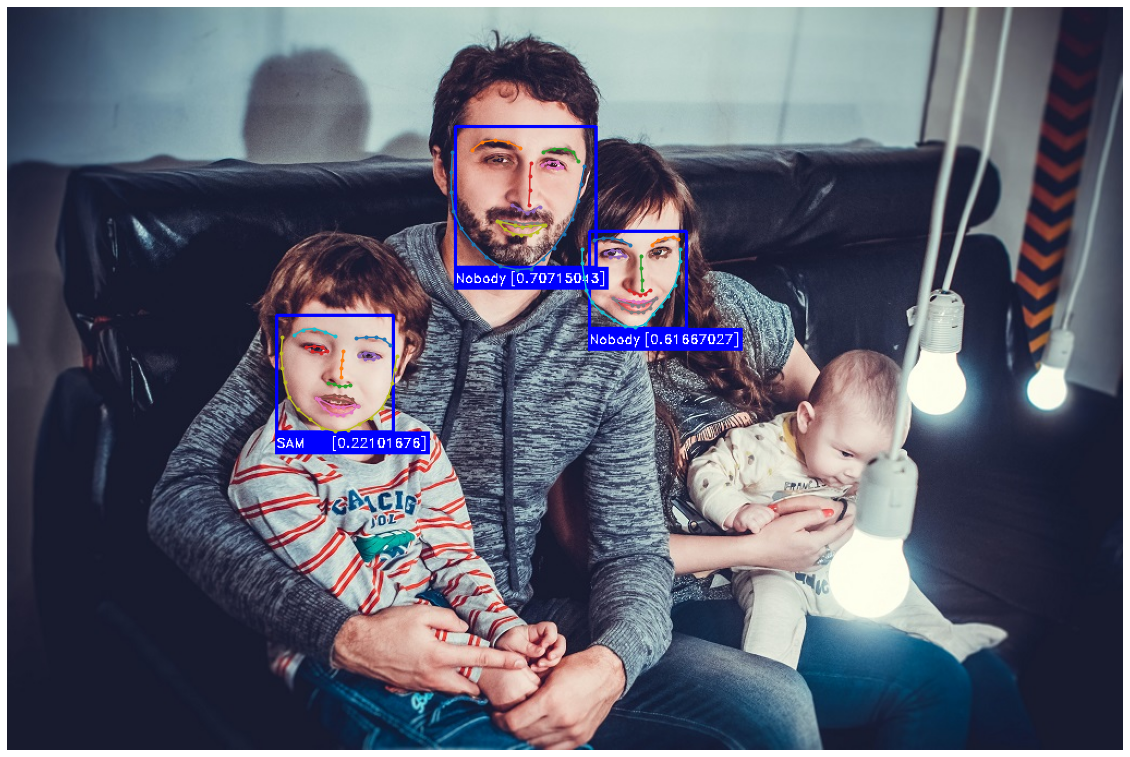

In [36]:
#課題② ヒント[2] Matplotlibを使用して特徴点を合成する。
#顔の各部位を描画して表示
#ここに追加

#課題② ヒント[3] 出力ファイル名を「output_landmarks.jpg」として出力する。
#ここに追加
